In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [134]:
!pip list |grep Keras

Keras                    2.2.4                
Keras-Applications       1.0.8                
Keras-Preprocessing      1.1.0                


In [123]:
import sys
import numpy
import matplotlib
import pandas
import keras

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Numpy: 1.16.4
Matplotlib: 3.0.3
Pandas: 0.24.2
Keras: 2.2.4


In [0]:

from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions



In [8]:
model = MobileNetV2(
  weights = 'imagenet',
  include_top = True,
  alpha = 1.0)

model.summary()

epochs = 10
img_size = 336

input_tensor = Input(shape=(img_size, img_size, 3))

base_model = MobileNetV2(
    weights='imagenet',
    include_top = False,
    input_tensor = input_tensor)
    
#     input_tensor = input_tensor)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 1s 0us/step


In [9]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 336, 336, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 337, 337, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 168, 168, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 168, 168, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
for layer in base_model.layers:
    layer.trainable = True
    
base_model.layers[0].trainable = False
base_model.layers[1].trainable = False

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

# x = Dense(
#     1024,
#     activation = 'relu')(x)

# x = Dropout(0.5)(x)

# x = Dense(
#     512,
#     activation = 'relu')(x)

output = Dense(
    5,
    activation='softmax')(x)

model = Model(
    inputs=base_model.input,
    outputs=output)

In [12]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 336, 336, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 337, 337, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 168, 168, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 168, 168, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0)
#     width_shift_range=0.2,
#     height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/data/train',
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/My Drive/data/valid',
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 4438 images belonging to 5 classes.
Found 1218 images belonging to 5 classes.


In [0]:
x_batch, y_batch = next(train_generator)

In [16]:
print(x_batch.max())
print(x_batch.min())

1.0
0.0


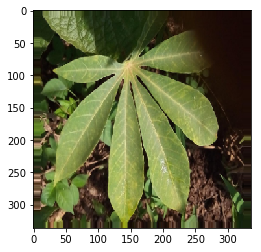

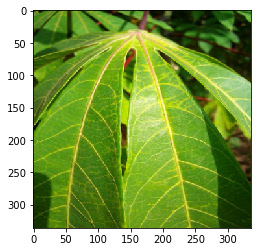

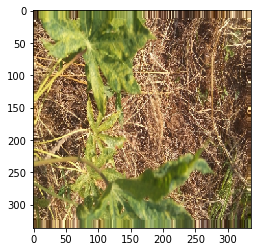

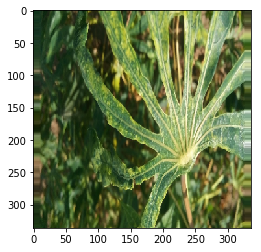

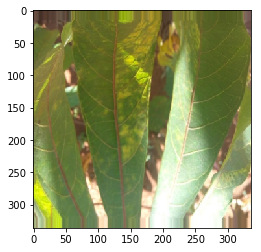

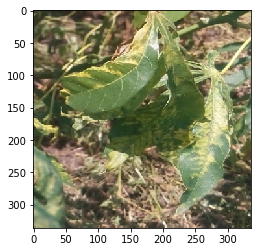

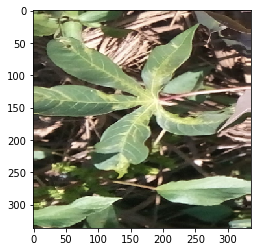

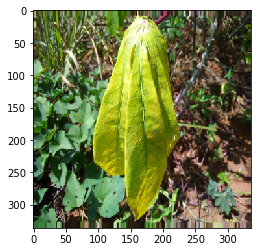

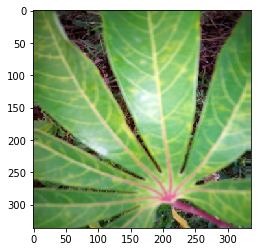

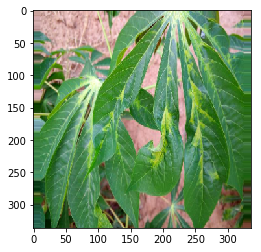

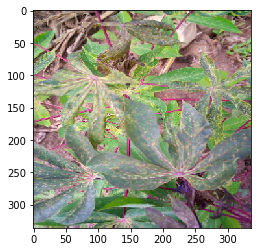

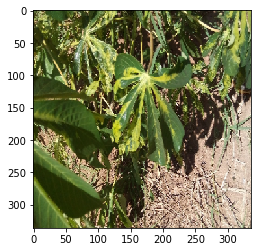

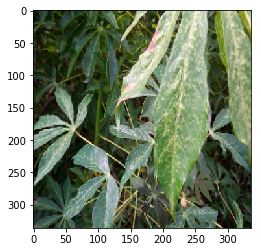

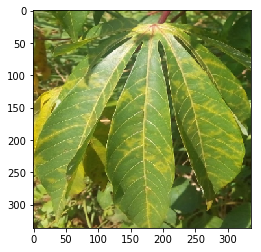

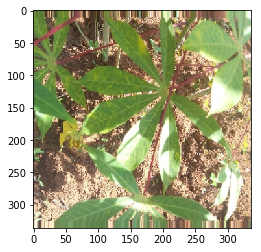

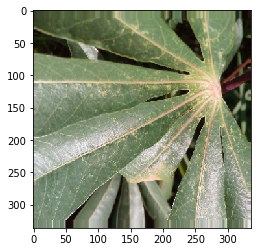

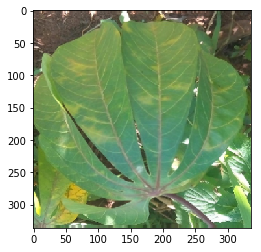

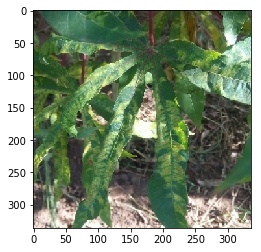

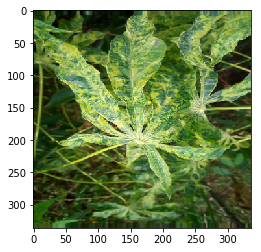

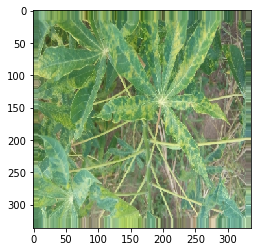

In [17]:
import matplotlib.pyplot as plt

for i in range (0,20):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [0]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = 1e-5),
              metrics = ['accuracy'])

# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     verbose=1,
#     restore_best_weights=False)

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"

# checkpoint = ModelCheckpoint(
#     filepath,
#     monitor='val_acc',
#     verbose=1,
#     save_best_only=True,
#     mode='max',
#     period = 5)


In [20]:
history = model.fit_generator(generator = train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size + 1,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size + 1,
                    epochs = epochs)
#                    callbacks = [checkpoint])

Epoch 1/10
222/222 [==============================] - 218s 984ms/step - loss: 0.3691 - acc: 0.8408 - val_loss: 0.3328 - val_acc: 0.8608
Epoch 2/10
222/222 [==============================] - 198s 891ms/step - loss: 0.2796 - acc: 0.8814 - val_loss: 0.2800 - val_acc: 0.8880
Epoch 3/10
222/222 [==============================] - 195s 880ms/step - loss: 0.2392 - acc: 0.9014 - val_loss: 0.2473 - val_acc: 0.9031
Epoch 4/10
222/222 [==============================] - 195s 879ms/step - loss: 0.2138 - acc: 0.9149 - val_loss: 0.2379 - val_acc: 0.9013
Epoch 5/10
222/222 [==============================] - 197s 886ms/step - loss: 0.1959 - acc: 0.9261 - val_loss: 0.2268 - val_acc: 0.9076
Epoch 6/10
222/222 [==============================] - 195s 880ms/step - loss: 0.1800 - acc: 0.9320 - val_loss: 0.2203 - val_acc: 0.9118
Epoch 7/10
222/222 [==============================] - 195s 880ms/step - loss: 0.1664 - acc: 0.9378 - val_loss: 0.2080 - val_acc: 0.9161
Epoch 8/10
222/222 [============================

In [32]:
history = model.fit_generator(generator = train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size + 1,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size + 1,
                    epochs = 5)
#                    callbacks = [checkpoint])

222/222 [==============================] - 214s 962ms/step - loss: 0.1364 - acc: 0.9490 - val_loss: 0.1742 - val_acc: 0.9369
Epoch 2/5
222/222 [==============================] - 205s 923ms/step - loss: 0.1355 - acc: 0.9497 - val_loss: 0.1729 - val_acc: 0.9386
Epoch 3/5
222/222 [==============================] - 205s 923ms/step - loss: 0.1272 - acc: 0.9529 - val_loss: 0.1664 - val_acc: 0.9406
Epoch 4/5
222/222 [==============================] - 206s 928ms/step - loss: 0.1215 - acc: 0.9534 - val_loss: 0.1677 - val_acc: 0.9406
Epoch 5/5
222/222 [==============================] - 206s 926ms/step - loss: 0.1206 - acc: 0.9560 - val_loss: 0.1608 - val_acc: 0.9430


In [33]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
                directory="/content/drive/My Drive/data/test",
                batch_size=1,
                seed=42,
                shuffle=False,
                class_mode='categorical',
                target_size=(img_size,img_size))

STEP_SIZE_TEST=test_generator.n
test_generator.reset()



Found 3774 images belonging to 1 classes.


In [34]:
pred=model.predict_generator(test_generator,
                steps=STEP_SIZE_TEST,
                verbose=1)

3774/3774 [==============================] - 69s 18ms/step


In [0]:
import numpy as np
import pandas as pd 

predicted_class_indices = np.argmax(
    pred,
    axis=1)

In [36]:
len(predicted_class_indices)

3774

In [37]:
predicted_class_indices[:10]

array([1, 1, 3, 2, 1, 3, 3, 3, 3, 2])

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Category":predictions,
                      "id":filenames})

In [39]:
results.head()

,Category,id
0,cbsd,0/test-img-0.jpg
1,cbsd,0/test-img-1.jpg
2,cmd,0/test-img-10.jpg
3,cgm,0/test-img-100.jpg
4,cbsd,0/test-img-1000.jpg


In [40]:
results.Category.value_counts()

cmd        1830
cbsd        886
cgm         509
cbb         313
healthy     236
Name: Category, dtype: int64

In [0]:
results.to_csv("submission.csv",index=False)

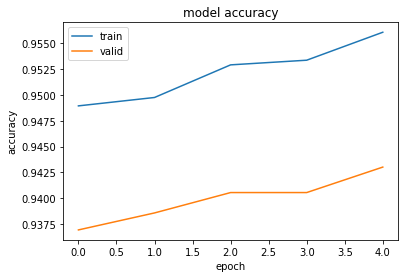

In [42]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

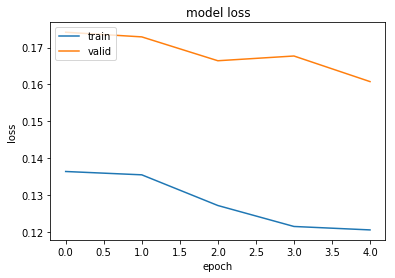

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()